# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 6. Поиск эволюционирующих шаблонов с помощью матричного профиля ряда.**

In [12]:
%load_ext autoreload
%autoreload 2

## **Часть 1.** Поиск цепочек временного ряда.

Импорт библиотек и модулей

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
from sklearn.metrics import mean_squared_error

В первом задании вам предстоит выполнить поиск эволюционирующих шаблонов временного ряда. Выполните считывание набора данных [Rotation Matrix](datasets/Rotation%20Matrix.txt), найдите в нем самую длинную цепочку и выведите индексы начала звеньев этой цепочки.

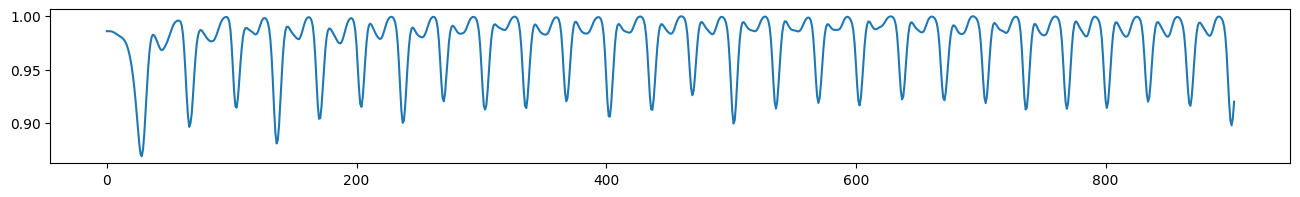

In [14]:
fig, ax = plt.subplots(figsize=(16, 2))
ts = np.loadtxt('datasets/Rotation Matrix.txt')
ax.plot(ts)

In [15]:
# Задание длины шаблона
m = 25

# Построение матрицы расстояний
mp = stumpy.stump(ts, m=m)

# Поиск всех цепочек и самой длинной цепочки
all_chain_set, unanchored_chain = stumpy.allc(mp[:, 2], mp[:, 3])

# Вывод индексов начала звеньев самой длинной цепочки
print("Индексы начала звеньев самой длинной цепочки:", unanchored_chain)

Индексы начала звеньев самой длинной цепочки: [199 331 398 432 863]


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Результаты анализа дают индексы начала звеньев самой длинной цепочки в временном ряду. Это важно для обнаружения повторяющихся структур или закономерностей в данных

Всего найдено 5 звеньев.

## **Часть 2. Визуализация цепочек**

Выполните визуализацию найденных в прошлом задании цепочек: постройте график временного ряда, на котором выделены звенья цепочек. Также постройте график, на котором изображены только сами звенья.

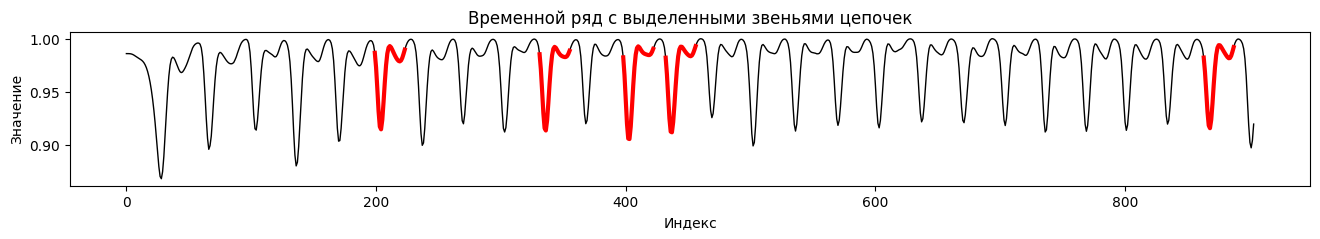

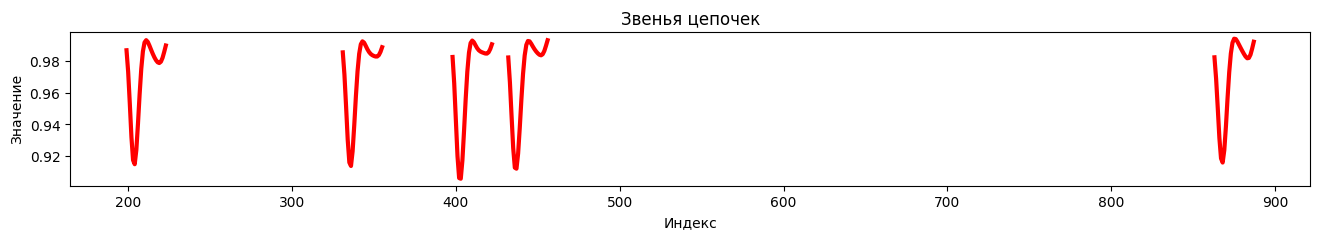

In [16]:
fig, ax = plt.subplots(figsize=(16, 2))
ax.plot(ts, linewidth=1, color='black', label='Временной ряд')
colors = plt.cm.viridis(np.linspace(0, 1, len(unanchored_chain)))

for i, chain_start in enumerate(unanchored_chain):
    y = ts[chain_start:chain_start + m]
    x = range(chain_start, chain_start + m)
    ax.plot(x, y, linewidth=3, color='red', label=f'Цепочка {i+1}')

plt.title('Временной ряд с выделенными звеньями цепочек')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.show()

fig, ax = plt.subplots(figsize=(16, 2))
for i, chain_start in enumerate(unanchored_chain):
    y = ts[chain_start:chain_start + m]
    x = range(chain_start, chain_start + m)
    ax.plot(x, y, linewidth=3, color='red', label=f'Цепочка {i+1}')

plt.title('Звенья цепочек')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

По данным графиков можно увидеть что найденные звенья имеют схожую форму, однако их размер отличается.

## **Часть 3.** Предсказывание значений ряда на основе цепочек.

Предскажите значения последнего звена цепочки, вычислив разность между двумя предыдущими звеньями цепочки. Сравните полученное предсказание с истинным значением.

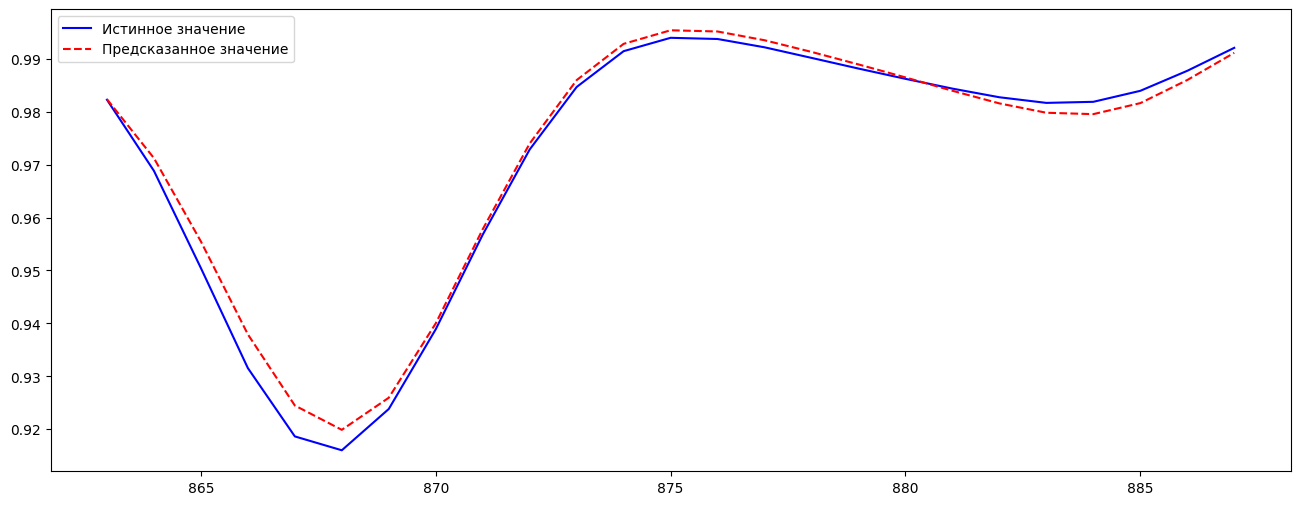

Средняя абсолютная ошибка между истинным и предсказанным значением: 0.0019526147999999965


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import stumpy

m = 25  

# Получаем два последних звенья
last_two_indices = unanchored_chain[-2:]
last_two_segments = [ts[idx:idx + m] for idx in last_two_indices]

# Вычисляем разность между последними двумя звеньями
diff = last_two_segments[1] - last_two_segments[0]

# Предсказанное значение последнего звена 
predicted_last_segment = last_two_segments[1] + diff

# Истинное значение последнего звена (используем сегмент, начиная с индекса последнего звена)
true_last_segment = ts[unanchored_chain[-1]:unanchored_chain[-1] + m]

# Визуализируем 
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(range(last_two_indices[1], last_two_indices[1] + m), true_last_segment, label="Истинное значение", color='blue')
ax.plot(range(last_two_indices[1], last_two_indices[1] + m), predicted_last_segment, label="Предсказанное значение", color='red', linestyle='--')
ax.legend()
plt.show()

# Выводим разницу между истинным и предсказанным значением
error = np.mean(np.abs(true_last_segment - predicted_last_segment))  # Средняя абсолютная ошибка
print(f"Средняя абсолютная ошибка между истинным и предсказанным значением: {error}")

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

На графике видно, что предсказанное значение (красная линия) очень близко к истинному значению (синяя линия), что говорит о том, что модель, основанная на разности между предыдущими звеньями цепочки, делает довольно точные предсказания.

Средняя абсолютная ошибка между истинным и предсказанным значением имеет низкое значение, что указывает на хорошее качество предсказания с использованием разности между двумя предыдущими звеньями.